# SPI 180d Example
a. stein 4.24.2023

In [1]:
import xarray as xr
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../')
import ndrought.drought_network_v12 as dnet
import ndrought.wrangle_v11 as dnw

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/plotting/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')

In [3]:
times = paired_ds['SPI Date'].sel(index=slice(231,247)).values
print(times[0])
print(times[-1])

2004-06-08T00:00:00.000000000
2004-09-26T00:00:00.000000000


In [4]:
spi180d_dnet = dnet.DroughtNetwork.unpickle('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/spi_180d_net_f25k_d1_rt20p_paired.pickle')

2004-10-11T00:00:00.000000000
2004-12-05T00:00:00.000000000


<AxesSubplot:xlabel='Time', ylabel='Area in Drought Event'>

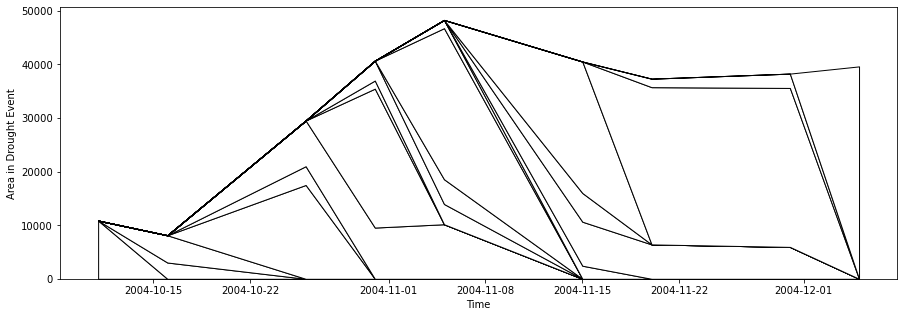

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

i = 10
start_time = 239+i
end_time = 247+i

times = paired_ds['SPI Date'].sel(index=slice(start_time,end_time)).values
print(times[0])
print(times[-1])

spi180d_dnet.stacked_events_plot(start_time=start_time, end_time=end_time, times=times, ax=ax, edgecolor='k', cmap=mpl.colors.ListedColormap('white'))

<AxesSubplot:xlabel='Time', ylabel='Area in Drought Event'>

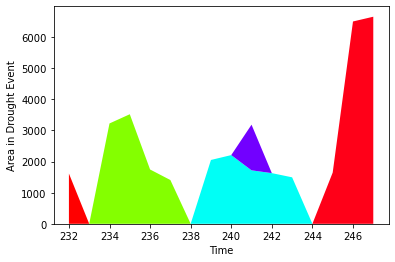

In [6]:
spi180d_dnet.stacked_events_plot(start_time=231, end_time=247)

In [7]:
spi_array = spi180d_dnet.to_array(start_time=start_time, end_time=end_time)

In [8]:
len(spi_array)

9

In [9]:
spi180d_da = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/spi_usdm_paired.nc')['spi_180d']

In [10]:
spi180d_da

<xarray.DataArray 'spi_180d' (index: 1149, y: 702, x: 525)>
[423463950 values with dtype=float32]
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 1142 1143 1144 1145 1146 1147 1148
  * y        (y) float64 3.251e+06 3.246e+06 3.242e+06 ... 2.717e+05 2.674e+05
  * x        (x) float64 -2.893e+06 -2.889e+06 ... -6.674e+05 -6.632e+05

In [11]:
da = spi180d_da.rio.set_crs('EPSG:5070', inplace=True)

In [12]:
da

<xarray.DataArray 'spi_180d' (index: 1149, y: 702, x: 525)>
[423463950 values with dtype=float32]
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 1142 1143 1144 1145 1146 1147 1148
  * y        (y) float64 3.251e+06 3.246e+06 3.242e+06 ... 2.717e+05 2.674e+05
  * x        (x) float64 -2.893e+06 -2.889e+06 ... -6.674e+05 -6.632e+05

In [13]:
da.shape

(1149, 702, 525)

In [14]:
spi_array.shape

(9, 702, 525)

In [15]:
sel_da = xr.DataArray(
    data=spi_array,
    dims=['time', 'y','x'],
    coords=dict(
        x=da.x.values,
        y=da.y.values,
        time=times
    )

).rio.set_crs('EPSG:5070', inplace=True)

In [16]:
sel_da

<xarray.DataArray (time: 9, y: 702, x: 525)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * x        (x) float64 -2.893e+06 -2.889e+06 ... -6.674e+05 -6.632e+05
  * y        (y) float64 3.251e+06 3.246e+06 3.242e+06 ... 2.717e+05 2.674e+05
  * time     (time) datetime64[ns] 2004-10-11 2004-10-16 ... 2004-12-05

In [23]:
import rasterio

In [24]:
sel_da_reproj = sel_da.rio.reproject('EPSG:4326', resampling=rasterio.enums.Resampling.mode)

In [25]:
sel_da_reproj.values

array([[[1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
        [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
        [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
        ...,
        [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
        [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
        [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308]],

       [[1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
        [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
         1.79769313e+308, 1.79769313e+

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.10/site-packages/matplotlib/image.py:446: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.10/site-packages/matplotlib/image.py:451: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.10/site-packages/matplotlib/image.py:503: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
/pool0/data/steinadi/.conda/envs/sedi/lib/python3.10/site-packages/matplotlib/image.py:504: RuntimeWarning: invalid value encountered in multiply
  vrange *= ((a_max - a_min) / frac)


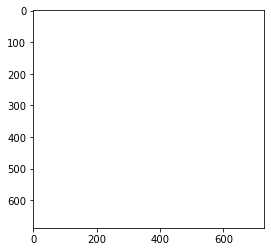

In [55]:
fig, ax = plt.subplots()
ax.imshow(sel_da.isel(time=0).values)

In [53]:
fig, axs = plt.subplots(3,3, figsize=(10,10))

for i, ax in enumerate(axs.ravel()):
    print(sel_da.isel(time=i))
    sel_da.isel(time=i).plot(ax=ax)
    #ax.set_aspect('equal')

plt.tight_layout()

<xarray.DataArray (y: 687, x: 729)>
array([[1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
       ...,
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308]])
Coordinates:
  * x            (x) float64 -134.9 -134.8 -134.8 ... -102.6 -102.6 -102.5
  * y            (y) float64 52.02 51.98 51.93 51.89 ... 21.67 21.63 21.58 21.54
    time         datetime64[ns] 2004-1

OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 720x720 with 18 Axes>

In [ ]:
spi180d_dnet.get_nx_network(start_time=231, end_time=247)

(<networkx.classes.graph.Graph at 0x7f299931b430>,
 {163: (28.597, 306.0),
  164: (103.6, 306.0),
  165: (103.6, 234.0),
  166: (103.6, 162.0),
  167: (103.6, 90.0),
  168: (178.6, 306.0),
  169: (178.6, 234.0),
  170: (253.6, 306.0),
  171: (178.6, 162.0),
  172: (178.6, 90.0),
  173: (178.6, 18.0),
  174: (328.6, 306.0),
  175: (328.6, 234.0),
  176: (328.6, 162.0)})